# Pacotes

## Pacotes de variável de ambiente

## Pacotes gerais

In [1]:
import os
import sys

print(os.environ.get("SPARK_HOME"))
print(os.environ.get("HADOOP_HOME"))
print(os.environ.get("JAVA_HOME"))

os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

C:\Users\pedro\Spark\spark-3.5.0-bin-hadoop3
C:\Users\pedro\hadoop\bin
C:\Program Files\Java\jdk1.8.0_202


In [27]:
import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.types import *
from pyspark.sql.functions import lower, upper,row_number,isnan, when, count, col, coalesce, broadcast, regexp_replace, regexp_extract, lit, countDistinct
from pyspark.sql import functions as F, Window, Row
from pyspark.sql.functions import *
#from functools import reduce

#Pyspark
import py4j
from pyspark import SparkContext,SQLContext,SparkConf,StorageLevel

## Pacotes para configurar sessão no spark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
                            
## Pacote para localizar o path spark 
import findspark

# Pacote de geração de gráficos
import seaborn as sns
import mpld3
import matplotlib.pyplot as plt
import missingno as msno #Pacote para ver dados missing
import plotly.express as px
import plotly.offline as pyoff
import plotly.graph_objs as go
pyoff.init_notebook_mode(connected=True)
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
#Pyspark
import py4j
from pyspark import SparkContext,SQLContext,SparkConf,StorageLevel

## Pacotes para configurar sessão no spark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
                            
## Pacote para localizar o path spark 
import findspark

# Configuração do ambiente local do pyspark

In [4]:
findspark.init()

In [5]:
#SparkSession.builder.config(conf=SparkConf())
# Como configurar localmente:
# https://towardsdatascience.com/basics-of-apache-spark-configuration-settings-ca4faff40d45

In [6]:
spark = (SparkSession.builder
    .master("local[*]")
    .config("yarn.nodemanager.resource.memory-mb", "15g")
    .config("yarn.scheduler.maximum-allocation-mb", "15g")
    .config("yarn.scheduler.minimum-allocation-mb", "3g")
#    .config("yarn.nodemanager.resource.cpu-vcores", "12")
#    .config("yarn.scheduler.maximum-allocation-vcores", "2")
#    .config("yarn.scheduler.minimum-allocation-vcores", "12")
    .config("spark.driver.cores", "3")
    .config("spark.driver.memory", "6g")
    .config("spark.default.parallelism",'100')
    .config("spark.executor.cores", "2")
    .config("spark.executor.instances", "4")
    .config("spark.executor.memory",'3g')
    .config("spark.memory.fraction",'0.65')
    .config("spark.memory.storageFraction",'0.55')
    .config("spark.memory.offHeap.enabled",'true')
    .config("spark.memory.offHeap.size","3g")   
#    .config("spark.executor.memoryOverhead.size","")   
    .config('spark.sql.repl.eagerEval.enabled', True)
    .config("spark.sql.repl.eagerEval.maxNumRows",10)
    .appName('dataset_cnpj')
    .getOrCreate())

In [7]:
spark

# Carregando dados

In [9]:
df=spark.read.parquet("dados_tratados")

# Tratamento pontuais e filtros

In [10]:
df = df.filter(F.col('MUNICIPIO').isNotNull())
df = df.filter(F.col('MUNICIPIO') != 'null')

df = df.filter(F.col('CNAE').isNotNull())
df = df.filter(F.col('CNAE') != 'null')

In [11]:
df = df.filter(F.col('NAT_JURIDICA') == 'Empresário (Individual)')
df = df.select('CNPJ_BASICO','NOME_EMPRESA','NOME_FANTASIA','DT_SIT_CADASTRAL','SIT_CADASTRAL',"DT_INICIO_ATIVIDADE",'MOTIVO','MATRIZ_FILIAL','CNAE','PORTE','CAP_SOCIAL','PROVEDOR','MUNICIPIO','UF','CEP', 'QUALIFICACAO')

In [14]:
df = df.withColumn( "DT_INICIO_ATIVIDADE", F.to_date(F.col("DT_INICIO_ATIVIDADE").cast("string"), "yyyyMMdd"))
df = df.withColumn( "DT_SIT_CADASTRAL", F.to_date(F.col("DT_SIT_CADASTRAL").cast("string"), "yyyyMMdd"))



df = df.withColumn( "ano_cadastro", F.year('DT_INICIO_ATIVIDADE'))
df = df.withColumn( "mes_cadastro", F.month('DT_INICIO_ATIVIDADE'))

df = df.withColumn( "ano_sit_cadastral", F.year('DT_SIT_CADASTRAL'))
df = df.withColumn( "mes_sit_cadastral", F.month('DT_SIT_CADASTRAL'))

In [ ]:
%%time
df.summary()

In [ ]:
%%time
df.describe()

In [ ]:
plot = px.scatter_geo(df_map, 
                      lat = 'ocorrencia_latitude',
                      lon = 'ocorrencia_longitude',
                      color = "ocorrencia_tipo",
                      scope = 'south america', 
                      hover_data= ["ocorrencia_tipo", "ocorrencia_classificacao"],
                      height = 610, width = 960) 
plot.show() 
#py.plot(plot, filename = 'ocorrencia_tipo', auto_open=True)

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregue o shapefile
brasil = gpd.read_file('caminho_para_seu_shapefile_dos_estados_brasileiros.shp')

# Dados fictícios para cada estado brasileiro (use os nomes reais dos estados)
data = {
    'Estado': ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', ...], # e assim por diante
    'Valor': [10, 15, 12, 20, 30, ...] # Valores fictícios
}

df = pd.DataFrame(data)

# Faça merge dos dados geográficos com seus dados fictícios
merged = brasil.set_index('NOME_DO_CAMPO_DO_ESTADO_NO_SHAPEFILE').join(df.set_index('Estado'))

# Plote o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.plot(column='Valor', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Heatmap dos Estados Brasileiros')
plt.show()


DriverError: caminho_para_seu_shapefile_dos_estados_brasileiros.shp: No such file or directory

In [15]:
%%time
df_sit_cads = df.groupBy('SIT_CADASTRAL').count().orderBy(F.col('count').desc()).toPandas()

CPU times: total: 0 ns
Wall time: 5.73 s


In [31]:
fig = px.histogram(df_sit_cads,
             x = "SIT_CADASTRAL", 
             y='count',
             height = 400, width = 700,
             histnorm = 'percent')
fig.update_xaxes(title = "Stiuação Cadastral")
fig.update_yaxes(title = "Quantidade")
fig.update_layout(yaxis_ticksuffix = "%")
fig.update_layout(
    title={
        'text': "Situção Cadastral dos MEIs no Brasil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'color': 'black'}})
py.plot(fig, filename = 'Count sit_cads', auto_open=False)
fig.write_html('situacao_cadastral.html')
#fig.show()

# Qual estado tem mais MEI? Quantidade de MEIs por estado

In [199]:
# API Plotly Chart Studio
username = 'mateusmoraesalmeida'
api_key = 'dnUuJyoLEJ0VrpwE4C3k'
chart_studio.tools.set_credentials_file (username = username, api_key = api_key)

In [18]:
%%time
df_uf = df.groupBy('UF','SIT_CADASTRAL').count().orderBy(F.col('count').desc()).toPandas()

CPU times: total: 0 ns
Wall time: 5.14 s


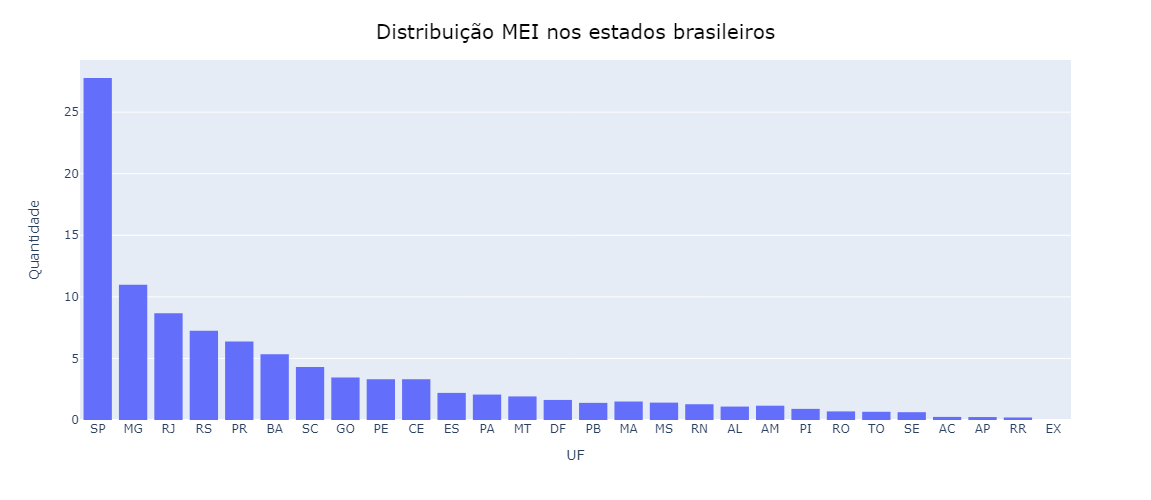

In [24]:
fig = px.histogram(df_uf,
             x = "UF", 
             y='count',
             height = 400, width = 700,
             histnorm = 'percent')
fig.update_xaxes(title = "UF")
fig.update_yaxes(title = "Quantidade")
#fig.show()
#py.plot(fig, filename = 'Count pnt', auto_open=True)
fig.update_layout(
    title={
        'text': "Distribuição MEI nos estados brasileiros",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'color': 'black'}})


In [44]:
fig = px.bar(df_uf,
             x = "UF", 
             y='count',
             color  = 'SIT_CADASTRAL',
             height = 500, width = 960)
fig.update_xaxes(title = "UF")
fig.update_yaxes(title = "Quantidade")
#fig.show()

fig.update_layout(
    title={
        'text': "Distribuição MEI nos estados brasileiros e sua situação cadastral",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'color': 'black'}})
py.plot(fig, filename = 'Count UF', auto_open=True)

'https://plotly.com/~mateusmoraesalmeida/1/'

# Quantos MEIs foram abertos por ano?

In [40]:
%%time
df_abertos = df.groupBy('ano_cadastro','MATRIZ_FILIAL').count().orderBy(F.col('ano_cadastro').desc()).toPandas()

CPU times: total: 0 ns
Wall time: 1min 19s


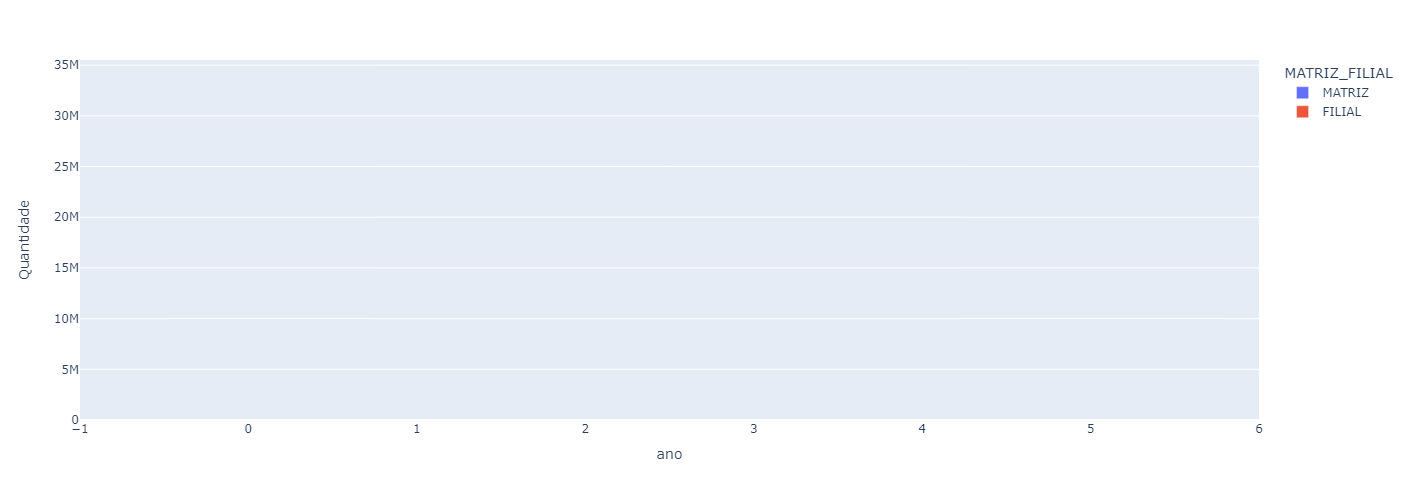

'https://plotly.com/~mateusmoraesalmeida/62/'

In [45]:
fig = px.bar(df_abertos,
             x = "ano_cadastro", 
             y='count',
             color  = 'MATRIZ_FILIAL',
             height = 500, width = 960)
fig.update_xaxes(title = "ano")
fig.update_yaxes(title = "Quantidade")
fig.show()
fig.update_layout(
    title={
        'text': "Origem ",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'color': 'black'}})
py.plot(fig, filename = 'Ano_cadastro', auto_open=False)

# MEI é só matriz ou tem filial?

In [105]:
%%time
df_abertos = df.groupBy('MATRIZ_FILIAL').count().orderBy(F.col('count').desc()).toPandas()

CPU times: total: 15.6 ms
Wall time: 5.28 s


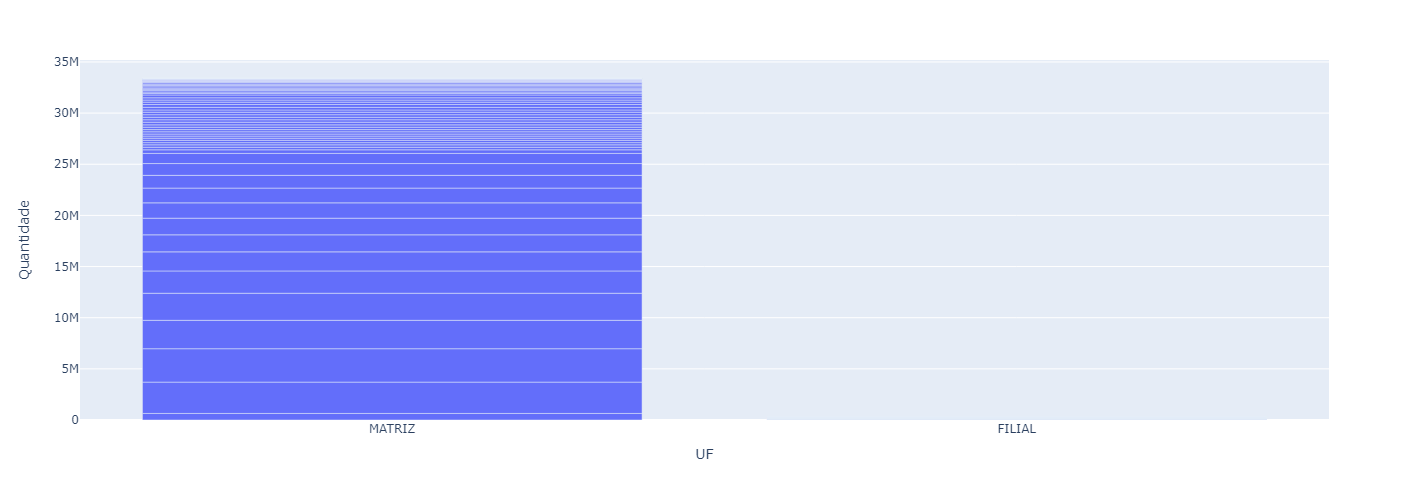

'https://plotly.com/~mateusmoraesalmeida/1/'

In [107]:
fig = px.bar(df_abertos,
             x = "MATRIZ_FILIAL", 
             y='count',
             height = 500, width = 960)
fig.update_xaxes(title = "UF")
fig.update_yaxes(title = "Quantidade")
fig.show()
py.plot(fig, filename = 'Count matriz_filial', auto_open=True)

# Quais são os 10 CNAEs mais cadastrados pelos MEIs

In [54]:
%%time
df_cnaes = df.groupBy('CNAE').count().orderBy(F.col('count').desc()).toPandas().head(10)

CPU times: total: 0 ns
Wall time: 4.41 s


In [39]:
fig = px.bar(df_cnaes,
             x = "CNAE", 
             y='count',
             height = 500, width = 960)
fig.update_xaxes(title = "CNAE")
fig.update_yaxes(title = "Quantidade")
#fig.show()
py.plot(fig, filename = 'Count cnaes', auto_open=True)

'https://plotly.com/~mateusmoraesalmeida/8/'

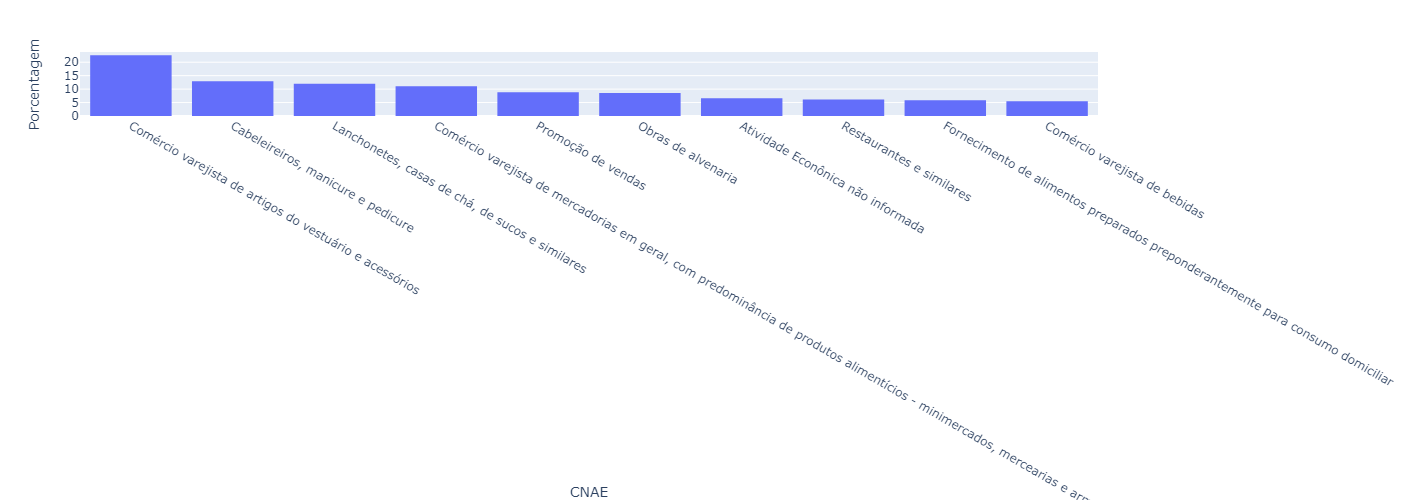

'https://plotly.com/~mateusmoraesalmeida/37/'

In [55]:
fig = px.histogram(df_cnaes,
             x = "CNAE", 
             y='count',
             height = 500, width = 960,
             histnorm = 'percent')
fig.update_xaxes(title = "CNAE")
fig.update_yaxes(title = "Porcentagem")
fig.show()
py.plot(fig, filename = 'Count cnae pnt', auto_open=True)

# Qual é o capital social da empresa de um MEI? (Média, mediana, distribuição)

In [57]:
df_cap_soc = df.filter((F.col('CAP_SOCIAL')>1)).select('CAP_SOCIAL').summary().toPandas()

In [58]:
%%time
quantiles = df.filter((F.col('CAP_SOCIAL')>1)).approxQuantile("CAP_SOCIAL", [0.05,0.10,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.95,0.99], 0)

CPU times: total: 0 ns
Wall time: 1min 47s


In [59]:
df_cap_soc_mean = df.filter((F.col('CAP_SOCIAL')>1)&(F.col('CAP_SOCIAL')<100001)).select(mean('CAP_SOCIAL')).toPandas()
df_cap_soc_mean = df_cap_soc_mean.round()

In [ ]:
lista cnaes quartiles

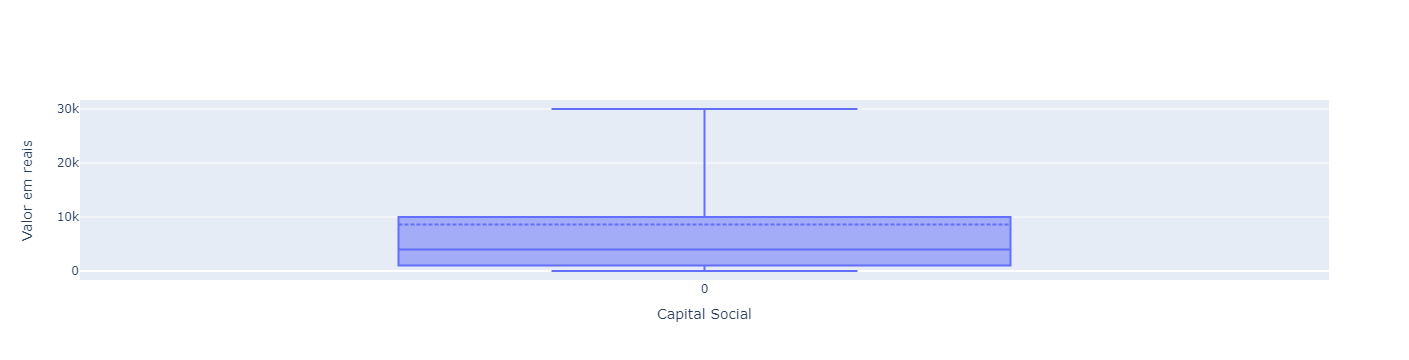

'https://plotly.com/~mateusmoraesalmeida/10/'

In [60]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=quantiles, orientation='v',boxmean=True, name='Capital Social'))

fig.update_traces(q1=quantiles[3:4], median=quantiles[6:7],
                  q3=quantiles[10:11],  upperfence=[30000],
                  lowerfence=[1], mean=[df_cap_soc_mean['avg(CAP_SOCIAL)'][0]])

fig.update_xaxes(title = "Capital Social")
fig.update_yaxes(title = "Valor em reais")
fig.show()

py.plot(fig, filename = 'box_cap_social', auto_open=True)

# Situação cadastral dos MEIs. Evolução da situação cadastral por ano.

In [25]:
%%time
df_sit_cad_ano = df.groupBy('ano_cadastro','SIT_CADASTRAL').count().orderBy(F.col('ano_cadastro').desc()).toPandas()

CPU times: total: 15.6 ms
Wall time: 10.6 s


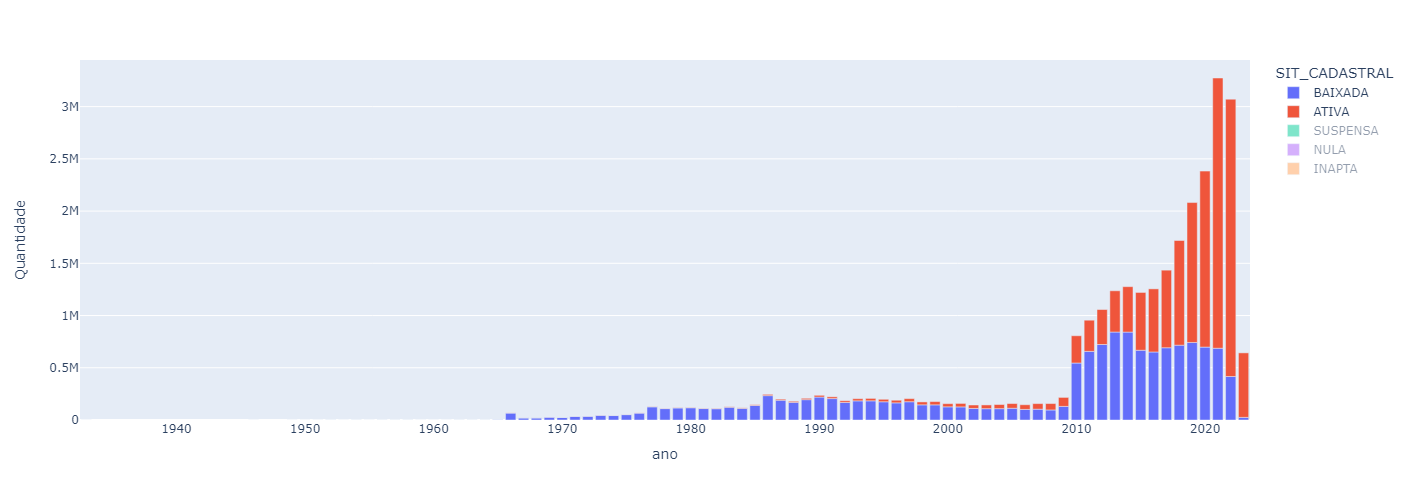

'https://plotly.com/~mateusmoraesalmeida/24/'

In [26]:
fig = px.bar(df_sit_cad_ano,
             x = "ano_cadastro", 
             y='count',
             color  = 'SIT_CADASTRAL',
             height = 500, width = 960)
fig.update_xaxes(title = "ano")
fig.update_yaxes(title = "Quantidade")
fig.show()
py.plot(fig, filename = 'Ano_sit_cadastro', auto_open=True)

# Quais são os 10 CNAEs com mais capital social e os 10 CNAEs com menos capital social?

In [45]:
%%time
df_cnaes_cap_soc2 =  df.filter((F.col('CAP_SOCIAL')>1)).groupBy('CNAE').agg(count("CNAE").alias("CNAE_count"), \
    avg("CAP_SOCIAL").alias("CAP_SOCIAL_avg"), min("CAP_SOCIAL").alias("min_quartil"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.05]).alias("quartil_05"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.10]).alias("quartil_10"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.15]).alias("quartil_15"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.20]).alias("quartil_20"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.25]).alias("quartil_25"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.30]).alias("quartil_30"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.35]).alias("quartil_35"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.40]).alias("quartil_40"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.45]).alias("quartil_45"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.50]).alias("quartil_50"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.55]).alias("quartil_55"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.60]).alias("quartil_60"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.65]).alias("quartil_65"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.70]).alias("quartil_70"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.75]).alias("quartil_75"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.80]).alias("quartil_80"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.85]).alias("quartil_85"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.90]).alias("quartil_90"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.95]).alias("quartil_95"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.99]).alias("quartil_99"),\
                                                                           max("CAP_SOCIAL").alias("max_cap_soc")).orderBy(F.col('CAP_SOCIAL_count').desc()).toPandas().head(10)

CPU times: total: 250 ms
Wall time: 14min 39s


In [55]:
df_cnaes_cap_soc2 = df_cnaes_cap_soc2.round()

In [83]:
def info_graf(lista_quart, lista_medidas, n_lista):
    lista_quartils = ['quartil_05', 'quartil_10','quartil_15', 'quartil_20',
                  'quartil_25', 'quartil_30','quartil_35', 'quartil_40',
                  'quartil_45', 'quartil_50','quartil_55', 'quartil_60',
                  'quartil_65', 'quartil_70','quartil_75', 'quartil_80',
                  'quartil_85', 'quartil_90', 'quartil_95']
    
    
    for i in range(len(lista_quartils)):
        quart_value = df_cnaes_cap_soc2[f'{lista_quartils[i]}'][n_lista][0]
        lista_quart.append(quart_value)
    
    min_value = df_cnaes_cap_soc2['min_quartil'][0]
    max_value = df_cnaes_cap_soc2['quartil_99'][n_lista][0]
    mean_value = df_cnaes_cap_soc2['CAP_SOCIAL_avg'][0]
    
    lista_medidas.append(min_value)
    lista_medidas.append(max_value)
    lista_medidas.append(mean_value)
    
    return lista_quart, lista_medidas

In [84]:
lista_cnae__quart_1 = []
lista_cnae_medidas_1 = []
lista_cnae__quart_2 = []
lista_cnae_medidas_2 = []
lista_cnae__quart_3 =  []
lista_cnae_medidas_3= []
lista_cnae__quart_4= []
lista_cnae_medidas_4= []
lista_cnae__quart_5 = []
lista_cnae_medidas_5 = []
lista_cnae__quart_6 = []
lista_cnae_medidas_6 = []
lista_cnae__quart_7 = []
lista_cnae_medidas_7= []
lista_cnae__quart_8= []
lista_cnae_medidas_8 = []
lista_cnae__quart_9 = []
lista_cnae_medidas_9 = []
lista_cnae__quart_10= []
lista_cnae_medidas_10 = []

In [85]:
lista_cnae__quart_1, lista_cnae_medidas_1 = info_graf(lista_cnae__quart_1, lista_cnae_medidas_1, 0)
lista_cnae__quart_2, lista_cnae_medidas_2 = info_graf(lista_cnae__quart_2, lista_cnae_medidas_2, 1)
lista_cnae__quart_3, lista_cnae_medidas_3 = info_graf(lista_cnae__quart_3, lista_cnae_medidas_3, 2)
lista_cnae__quart_4, lista_cnae_medidas_4 = info_graf(lista_cnae__quart_4, lista_cnae_medidas_4, 3)
lista_cnae__quart_5, lista_cnae_medidas_5 = info_graf(lista_cnae__quart_5, lista_cnae_medidas_5, 4)
lista_cnae__quart_6, lista_cnae_medidas_6 = info_graf(lista_cnae__quart_6, lista_cnae_medidas_6, 5)
lista_cnae__quart_7, lista_cnae_medidas_7 = info_graf(lista_cnae__quart_7, lista_cnae_medidas_7, 6)
lista_cnae__quart_8, lista_cnae_medidas_8 = info_graf(lista_cnae__quart_8, lista_cnae_medidas_8, 7)
lista_cnae__quart_9, lista_cnae_medidas_9 = info_graf(lista_cnae__quart_9, lista_cnae_medidas_9, 8)
lista_cnae__quart_10, lista_cnae_medidas_10 = info_graf(lista_cnae__quart_10, lista_cnae_medidas_10, 9)

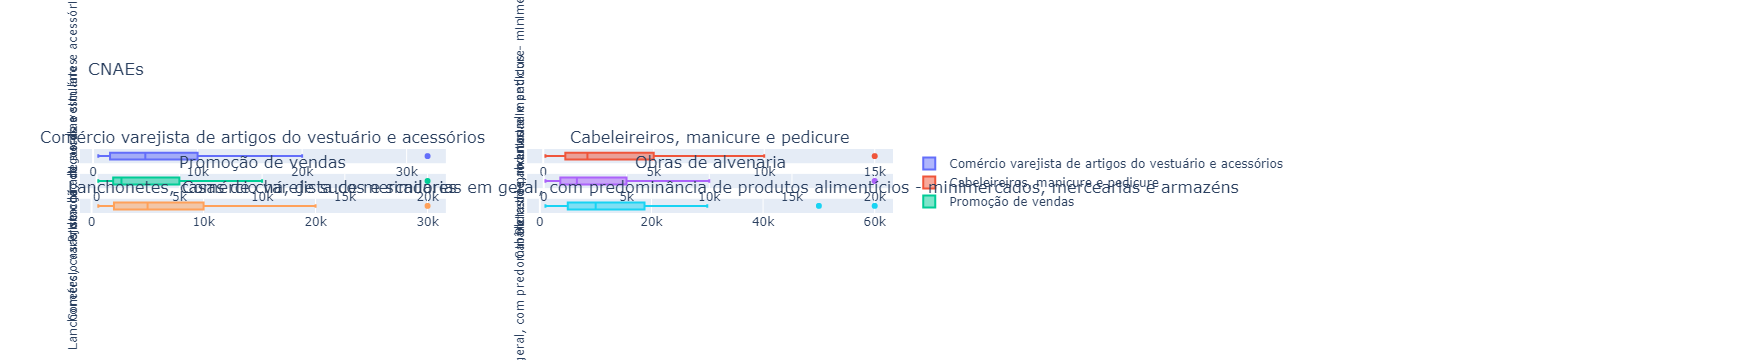

'https://plotly.com/~mateusmoraesalmeida/41/'

In [151]:
#fig = go.Figure()
fig = make_subplots(rows=3, cols=2, subplot_titles=[df_cnaes_cap_soc2['CNAE'][0], df_cnaes_cap_soc2['CNAE'][1],
                                                    df_cnaes_cap_soc2['CNAE'][2], df_cnaes_cap_soc2['CNAE'][3], 
                                                    df_cnaes_cap_soc2['CNAE'][4], df_cnaes_cap_soc2['CNAE'][5]])



b1 = go.Box(x=lista_cnae__quart_1, orientation='h', name=df_cnaes_cap_soc2['CNAE'][0])
fig.update_traces(q1=[lista_cnae__quart_1[4]], median=[lista_cnae__quart_1[9]],
                  q3=[lista_cnae__quart_1[14]],  upperfence=[lista_cnae_medidas_1[1]],
                  lowerfence=[lista_cnae_medidas_1[0]], mean=[lista_cnae_medidas_1[2]])
fig.update_yaxes(tickangle=270)



b2 = go.Box(x=lista_cnae__quart_2, orientation='h', name=df_cnaes_cap_soc2['CNAE'][1])
fig.update_traces(q1=[lista_cnae__quart_2[4]], median=[lista_cnae__quart_2[9]],
                  q3=[lista_cnae__quart_2[14]],  upperfence=[lista_cnae_medidas_2[1]],
                  lowerfence=[lista_cnae_medidas_2[0]], mean=[lista_cnae_medidas_2[2]])

b3 = go.Box(x=lista_cnae__quart_3, orientation='h', name=df_cnaes_cap_soc2['CNAE'][2])
fig.update_traces(q1=[lista_cnae__quart_3[4]], median=[lista_cnae__quart_3[9]],
                  q3=[lista_cnae__quart_3[14]],  upperfence=[lista_cnae_medidas_3[1]],
                  lowerfence=[lista_cnae_medidas_3[0]], mean=[lista_cnae_medidas_3[2]])



b4 = go.Box(x=lista_cnae__quart_4, orientation='h', name=df_cnaes_cap_soc2['CNAE'][3])
fig.update_traces(q1=[lista_cnae__quart_4[4]], median=[lista_cnae__quart_4[9]],
                  q3=[lista_cnae__quart_4[14]],  upperfence=[lista_cnae_medidas_4[1]],
                  lowerfence=[lista_cnae_medidas_4[0]], mean=[lista_cnae_medidas_4[2]])



b5 = go.Box(x=lista_cnae__quart_5, orientation='h', name=df_cnaes_cap_soc2['CNAE'][4])
fig.update_traces(q1=[lista_cnae__quart_5[4]], median=[lista_cnae__quart_5[9]],
                  q3=[lista_cnae__quart_5[14]],  upperfence=[lista_cnae_medidas_5[1]],
                  lowerfence=[lista_cnae_medidas_5[0]], mean=[lista_cnae_medidas_5[2]])



b6 = go.Box(x=lista_cnae__quart_6, orientation='h', name=df_cnaes_cap_soc2['CNAE'][5])
fig.update_traces(q1=[lista_cnae__quart_6[4]], median=[lista_cnae__quart_6[9]],
                  q3=[lista_cnae__quart_6[14]],  upperfence=[lista_cnae_medidas_6[1]],
                  lowerfence=[lista_cnae_medidas_4[0]], mean=[lista_cnae_medidas_6[2]])


fig.add_traces(b1, 1, 1)
fig.add_traces(b2, 1, 2)
fig.add_traces(b3, 2, 1)
fig.add_traces(b4, 2, 2)
fig.add_traces(b5, 3, 1)
fig.add_traces(b6, 3, 2)


fig.update_layout( title='CNAEs')

fig.show()

py.plot(fig, filename = 'cnae_ind_plot_1', auto_open=True)

#  Quais os provedores de e-mail mais utilizados para cadastrar o MEI na receita federal?

In [161]:
%%time
df_motivo = df.filter((F.col('SIT_CADASTRAL')!='BAIXADA') & (F.col('MOTIVO')!='SEM MOTIVO') ).groupBy('MOTIVO').count().orderBy(F.col('count').desc()).toPandas()

CPU times: total: 15.6 ms
Wall time: 3 s


In [162]:
df_motivo

,MOTIVO,count
0,OMISSAO DE DECLARACOES,5229239
1,PEDIDO DE BAIXA INDEFERIDA,53060
2,ANULACAO POR NAO CONFIRMADO ATO DE REGISTRO DO...,40839
3,ANULACAO POR VICIOS,18175
4,INTERRUPCAO TEMPORARIA DAS ATIVIDADES,8946
5,INCONSISTENCIA CADASTRAL,6857
6,BAIXA INICIADA EM ANALISE,4534
7,ANULACAO POR MULTICIPLIDADE,3933
8,ANULACAO DE INSCRICAO INDEVIDA,2212
9,INEXISTENCIA DE FATO,421


In [157]:
df_cap_his = df.filter((F.col('CAP_SOCIAL')>1)&(F.col('CAP_SOCIAL')<150001)).select('CAP_SOCIAL').toPandas()

In [169]:
import plotly.express as px

fig = px.histogram(df_cap_his, x="CAP_SOCIAL", nbins=20,
                   marginal="box", # or violin, rug
                   hover_data=df_cap_his.columns)
fig.show()

In [ ]:
fig = px.histogram(df_sit_cads,
             x = "SIT_CADASTRAL", 
             y='count',
             height = 500, width = 960,
             histnorm = 'percent')

In [170]:
df_cap_his.describe() 

,CAP_SOCIAL
count,2.390913e+07
mean,8.985578e+03
std,1.605630e+04
min,1.010000e+00
25%,1.000000e+03
50%,4.000000e+03
75%,1.000000e+04
max,1.500010e+05


# Quais os principais motivos dos MEIs que foram dados baixa (situação cadastral)?
	


#  Qual é o capital social dos principais MEIs que deram baixa?
	


#  Podemos pegar os dados de renda per capta por município e cruzar com o valor médio do capital social de cada MEI. Ou ver se existe correlação entre renda per capita e quantidade de MEIs

# Quais são os 10 CNAEs com mais capital social e os 10 CNAEs com menos capital social?

In [15]:
%%time
df_motivo_cap_soc =  df.filter((F.col('CAP_SOCIAL')>1) & (F.col('SIT_CADASTRAL') == 'BAIXADA')).groupBy('MOTIVO').agg(count("MOTIVO").alias("MOTIVO_count"), \
    avg("CAP_SOCIAL").alias("CAP_SOCIAL_avg"), min("CAP_SOCIAL").alias("min_quartil"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.05]).alias("quartil_05"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.10]).alias("quartil_10"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.15]).alias("quartil_15"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.20]).alias("quartil_20"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.25]).alias("quartil_25"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.30]).alias("quartil_30"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.35]).alias("quartil_35"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.40]).alias("quartil_40"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.45]).alias("quartil_45"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.50]).alias("quartil_50"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.55]).alias("quartil_55"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.60]).alias("quartil_60"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.65]).alias("quartil_65"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.70]).alias("quartil_70"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.75]).alias("quartil_75"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.80]).alias("quartil_80"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.85]).alias("quartil_85"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.90]).alias("quartil_90"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.95]).alias("quartil_95"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.99]).alias("quartil_99"),\
                                                                           max("CAP_SOCIAL").alias("max_cap_soc")).orderBy(F.col('MOTIVO_count').desc()).toPandas().head(10)

df_motivo_cap_soc = df_motivo_cap_soc.round()

CPU times: total: 46.9 ms
Wall time: 1min 23s


In [83]:
def info_graf(lista_quart, lista_medidas, n_lista):
    lista_quartils = ['quartil_05', 'quartil_10','quartil_15', 'quartil_20',
                  'quartil_25', 'quartil_30','quartil_35', 'quartil_40',
                  'quartil_45', 'quartil_50','quartil_55', 'quartil_60',
                  'quartil_65', 'quartil_70','quartil_75', 'quartil_80',
                  'quartil_85', 'quartil_90', 'quartil_95']
    
    
    for i in range(len(lista_quartils)):
        quart_value = df_cnaes_cap_soc2[f'{lista_quartils[i]}'][n_lista][0]
        lista_quart.append(quart_value)
    
    min_value = df_cnaes_cap_soc2['min_quartil'][0]
    max_value = df_cnaes_cap_soc2['quartil_99'][n_lista][0]
    mean_value = df_cnaes_cap_soc2['CAP_SOCIAL_avg'][0]
    
    lista_medidas.append(min_value)
    lista_medidas.append(max_value)
    lista_medidas.append(mean_value)
    
    return lista_quart, lista_medidas

In [84]:
lista_cnae__quart_1 = []
lista_cnae_medidas_1 = []
lista_cnae__quart_2 = []
lista_cnae_medidas_2 = []
lista_cnae__quart_3 =  []
lista_cnae_medidas_3= []
lista_cnae__quart_4= []
lista_cnae_medidas_4= []
lista_cnae__quart_5 = []
lista_cnae_medidas_5 = []
lista_cnae__quart_6 = []
lista_cnae_medidas_6 = []
lista_cnae__quart_7 = []
lista_cnae_medidas_7= []
lista_cnae__quart_8= []
lista_cnae_medidas_8 = []
lista_cnae__quart_9 = []
lista_cnae_medidas_9 = []
lista_cnae__quart_10= []
lista_cnae_medidas_10 = []

In [85]:
lista_cnae__quart_1, lista_cnae_medidas_1 = info_graf(lista_cnae__quart_1, lista_cnae_medidas_1, 0)
lista_cnae__quart_2, lista_cnae_medidas_2 = info_graf(lista_cnae__quart_2, lista_cnae_medidas_2, 1)
lista_cnae__quart_3, lista_cnae_medidas_3 = info_graf(lista_cnae__quart_3, lista_cnae_medidas_3, 2)
lista_cnae__quart_4, lista_cnae_medidas_4 = info_graf(lista_cnae__quart_4, lista_cnae_medidas_4, 3)
lista_cnae__quart_5, lista_cnae_medidas_5 = info_graf(lista_cnae__quart_5, lista_cnae_medidas_5, 4)
lista_cnae__quart_6, lista_cnae_medidas_6 = info_graf(lista_cnae__quart_6, lista_cnae_medidas_6, 5)
lista_cnae__quart_7, lista_cnae_medidas_7 = info_graf(lista_cnae__quart_7, lista_cnae_medidas_7, 6)
lista_cnae__quart_8, lista_cnae_medidas_8 = info_graf(lista_cnae__quart_8, lista_cnae_medidas_8, 7)
lista_cnae__quart_9, lista_cnae_medidas_9 = info_graf(lista_cnae__quart_9, lista_cnae_medidas_9, 8)
lista_cnae__quart_10, lista_cnae_medidas_10 = info_graf(lista_cnae__quart_10, lista_cnae_medidas_10, 9)

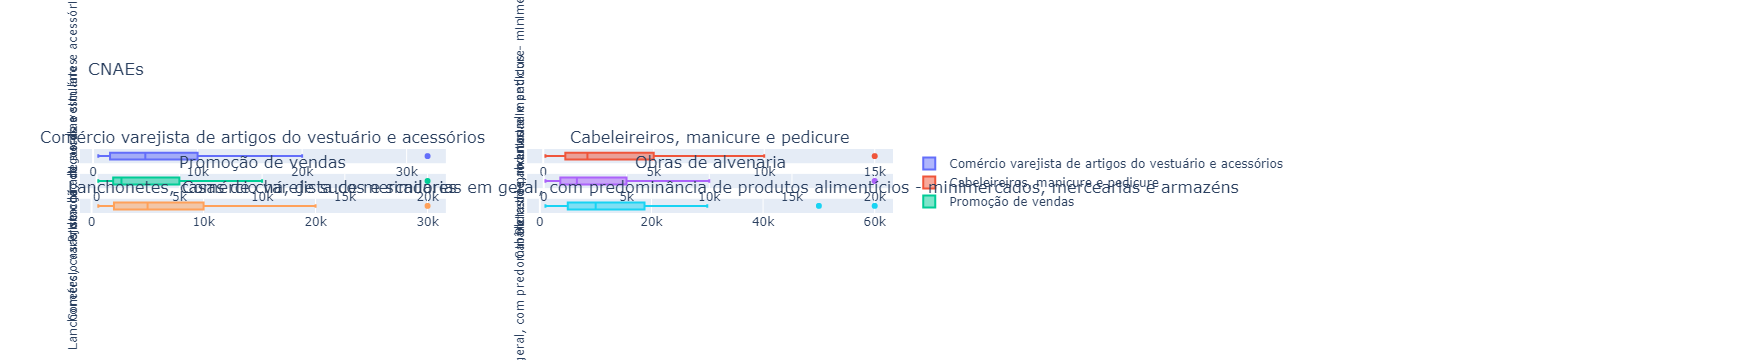

'https://plotly.com/~mateusmoraesalmeida/41/'

In [151]:
#fig = go.Figure()
fig = make_subplots(rows=3, cols=2, subplot_titles=[df_cnaes_cap_soc2['CNAE'][0], df_cnaes_cap_soc2['CNAE'][1],
                                                    df_cnaes_cap_soc2['CNAE'][2], df_cnaes_cap_soc2['CNAE'][3], 
                                                    df_cnaes_cap_soc2['CNAE'][4], df_cnaes_cap_soc2['CNAE'][5]])



b1 = go.Box(x=lista_cnae__quart_1, orientation='h', name=df_cnaes_cap_soc2['CNAE'][0])
fig.update_traces(q1=[lista_cnae__quart_1[4]], median=[lista_cnae__quart_1[9]],
                  q3=[lista_cnae__quart_1[14]],  upperfence=[lista_cnae_medidas_1[1]],
                  lowerfence=[lista_cnae_medidas_1[0]], mean=[lista_cnae_medidas_1[2]])
fig.update_yaxes(tickangle=270)



b2 = go.Box(x=lista_cnae__quart_2, orientation='h', name=df_cnaes_cap_soc2['CNAE'][1])
fig.update_traces(q1=[lista_cnae__quart_2[4]], median=[lista_cnae__quart_2[9]],
                  q3=[lista_cnae__quart_2[14]],  upperfence=[lista_cnae_medidas_2[1]],
                  lowerfence=[lista_cnae_medidas_2[0]], mean=[lista_cnae_medidas_2[2]])

b3 = go.Box(x=lista_cnae__quart_3, orientation='h', name=df_cnaes_cap_soc2['CNAE'][2])
fig.update_traces(q1=[lista_cnae__quart_3[4]], median=[lista_cnae__quart_3[9]],
                  q3=[lista_cnae__quart_3[14]],  upperfence=[lista_cnae_medidas_3[1]],
                  lowerfence=[lista_cnae_medidas_3[0]], mean=[lista_cnae_medidas_3[2]])



b4 = go.Box(x=lista_cnae__quart_4, orientation='h', name=df_cnaes_cap_soc2['CNAE'][3])
fig.update_traces(q1=[lista_cnae__quart_4[4]], median=[lista_cnae__quart_4[9]],
                  q3=[lista_cnae__quart_4[14]],  upperfence=[lista_cnae_medidas_4[1]],
                  lowerfence=[lista_cnae_medidas_4[0]], mean=[lista_cnae_medidas_4[2]])



b5 = go.Box(x=lista_cnae__quart_5, orientation='h', name=df_cnaes_cap_soc2['CNAE'][4])
fig.update_traces(q1=[lista_cnae__quart_5[4]], median=[lista_cnae__quart_5[9]],
                  q3=[lista_cnae__quart_5[14]],  upperfence=[lista_cnae_medidas_5[1]],
                  lowerfence=[lista_cnae_medidas_5[0]], mean=[lista_cnae_medidas_5[2]])



b6 = go.Box(x=lista_cnae__quart_6, orientation='h', name=df_cnaes_cap_soc2['CNAE'][5])
fig.update_traces(q1=[lista_cnae__quart_6[4]], median=[lista_cnae__quart_6[9]],
                  q3=[lista_cnae__quart_6[14]],  upperfence=[lista_cnae_medidas_6[1]],
                  lowerfence=[lista_cnae_medidas_4[0]], mean=[lista_cnae_medidas_6[2]])


fig.add_traces(b1, 1, 1)
fig.add_traces(b2, 1, 2)
fig.add_traces(b3, 2, 1)
fig.add_traces(b4, 2, 2)
fig.add_traces(b5, 3, 1)
fig.add_traces(b6, 3, 2)


fig.update_layout( title='CNAEs')

fig.show()

py.plot(fig, filename = 'cnae_ind_plot_1', auto_open=True)

# Quais são os 10 CNAEs com mais capital social e os 10 CNAEs com menos capital social?

In [15]:
%%time
df_motivo_cap_soc =  df.filter((F.col('CAP_SOCIAL')>1)).groupBy('SIT_CADASTRAL').agg(count("MOTIVO").alias("MOTIVO_count"), \
    avg("CAP_SOCIAL").alias("CAP_SOCIAL_avg"), min("CAP_SOCIAL").alias("min_quartil"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.05]).alias("quartil_05"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.10]).alias("quartil_10"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.15]).alias("quartil_15"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.20]).alias("quartil_20"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.25]).alias("quartil_25"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.30]).alias("quartil_30"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.35]).alias("quartil_35"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.40]).alias("quartil_40"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.45]).alias("quartil_45"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.50]).alias("quartil_50"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.55]).alias("quartil_55"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.60]).alias("quartil_60"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.65]).alias("quartil_65"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.70]).alias("quartil_70"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.75]).alias("quartil_75"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.80]).alias("quartil_80"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.85]).alias("quartil_85"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.90]).alias("quartil_90"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.95]).alias("quartil_95"),\
                                                                           percentile_approx("CAP_SOCIAL", [0.99]).alias("quartil_99"),\
                                                                           max("CAP_SOCIAL").alias("max_cap_soc")).orderBy(F.col('MOTIVO_count').desc()).toPandas().head(10)

df_motivo_cap_soc = df_motivo_cap_soc.round()

CPU times: total: 46.9 ms
Wall time: 1min 23s


In [83]:
def info_graf(lista_quart, lista_medidas, n_lista):
    lista_quartils = ['quartil_05', 'quartil_10','quartil_15', 'quartil_20',
                  'quartil_25', 'quartil_30','quartil_35', 'quartil_40',
                  'quartil_45', 'quartil_50','quartil_55', 'quartil_60',
                  'quartil_65', 'quartil_70','quartil_75', 'quartil_80',
                  'quartil_85', 'quartil_90', 'quartil_95']
    
    
    for i in range(len(lista_quartils)):
        quart_value = df_cnaes_cap_soc2[f'{lista_quartils[i]}'][n_lista][0]
        lista_quart.append(quart_value)
    
    min_value = df_cnaes_cap_soc2['min_quartil'][0]
    max_value = df_cnaes_cap_soc2['quartil_99'][n_lista][0]
    mean_value = df_cnaes_cap_soc2['CAP_SOCIAL_avg'][0]
    
    lista_medidas.append(min_value)
    lista_medidas.append(max_value)
    lista_medidas.append(mean_value)
    
    return lista_quart, lista_medidas

In [84]:
lista_cnae__quart_1 = []
lista_cnae_medidas_1 = []
lista_cnae__quart_2 = []
lista_cnae_medidas_2 = []
lista_cnae__quart_3 =  []
lista_cnae_medidas_3= []
lista_cnae__quart_4= []
lista_cnae_medidas_4= []
lista_cnae__quart_5 = []
lista_cnae_medidas_5 = []
lista_cnae__quart_6 = []
lista_cnae_medidas_6 = []
lista_cnae__quart_7 = []
lista_cnae_medidas_7= []
lista_cnae__quart_8= []
lista_cnae_medidas_8 = []
lista_cnae__quart_9 = []
lista_cnae_medidas_9 = []
lista_cnae__quart_10= []
lista_cnae_medidas_10 = []

In [85]:
lista_cnae__quart_1, lista_cnae_medidas_1 = info_graf(lista_cnae__quart_1, lista_cnae_medidas_1, 0)
lista_cnae__quart_2, lista_cnae_medidas_2 = info_graf(lista_cnae__quart_2, lista_cnae_medidas_2, 1)
lista_cnae__quart_3, lista_cnae_medidas_3 = info_graf(lista_cnae__quart_3, lista_cnae_medidas_3, 2)
lista_cnae__quart_4, lista_cnae_medidas_4 = info_graf(lista_cnae__quart_4, lista_cnae_medidas_4, 3)
lista_cnae__quart_5, lista_cnae_medidas_5 = info_graf(lista_cnae__quart_5, lista_cnae_medidas_5, 4)
lista_cnae__quart_6, lista_cnae_medidas_6 = info_graf(lista_cnae__quart_6, lista_cnae_medidas_6, 5)
lista_cnae__quart_7, lista_cnae_medidas_7 = info_graf(lista_cnae__quart_7, lista_cnae_medidas_7, 6)
lista_cnae__quart_8, lista_cnae_medidas_8 = info_graf(lista_cnae__quart_8, lista_cnae_medidas_8, 7)
lista_cnae__quart_9, lista_cnae_medidas_9 = info_graf(lista_cnae__quart_9, lista_cnae_medidas_9, 8)
lista_cnae__quart_10, lista_cnae_medidas_10 = info_graf(lista_cnae__quart_10, lista_cnae_medidas_10, 9)

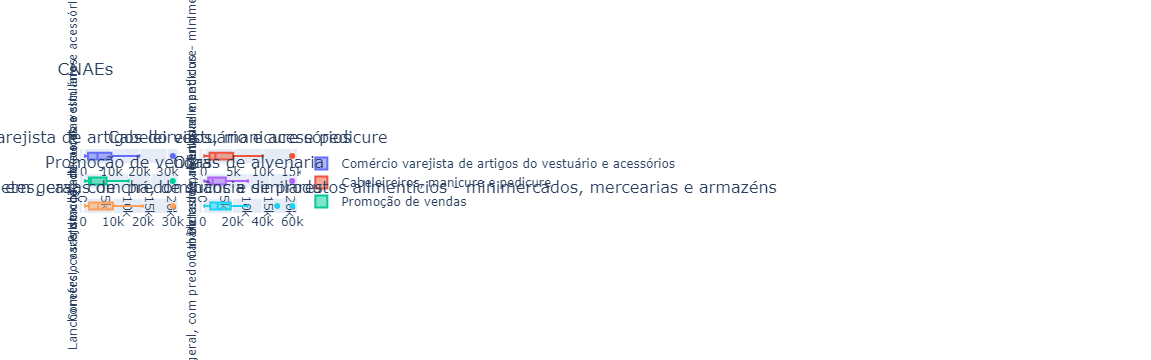

'https://plotly.com/~mateusmoraesalmeida/41/'

In [151]:
#fig = go.Figure()
fig = make_subplots(rows=3, cols=2, subplot_titles=[df_cnaes_cap_soc2['CNAE'][0], df_cnaes_cap_soc2['CNAE'][1],
                                                    df_cnaes_cap_soc2['CNAE'][2], df_cnaes_cap_soc2['CNAE'][3], 
                                                    df_cnaes_cap_soc2['CNAE'][4], df_cnaes_cap_soc2['CNAE'][5]])



b1 = go.Box(x=lista_cnae__quart_1, orientation='h', name=df_cnaes_cap_soc2['CNAE'][0])
fig.update_traces(q1=[lista_cnae__quart_1[4]], median=[lista_cnae__quart_1[9]],
                  q3=[lista_cnae__quart_1[14]],  upperfence=[lista_cnae_medidas_1[1]],
                  lowerfence=[lista_cnae_medidas_1[0]], mean=[lista_cnae_medidas_1[2]])
fig.update_yaxes(tickangle=270)



b2 = go.Box(x=lista_cnae__quart_2, orientation='h', name=df_cnaes_cap_soc2['CNAE'][1])
fig.update_traces(q1=[lista_cnae__quart_2[4]], median=[lista_cnae__quart_2[9]],
                  q3=[lista_cnae__quart_2[14]],  upperfence=[lista_cnae_medidas_2[1]],
                  lowerfence=[lista_cnae_medidas_2[0]], mean=[lista_cnae_medidas_2[2]])

b3 = go.Box(x=lista_cnae__quart_3, orientation='h', name=df_cnaes_cap_soc2['CNAE'][2])
fig.update_traces(q1=[lista_cnae__quart_3[4]], median=[lista_cnae__quart_3[9]],
                  q3=[lista_cnae__quart_3[14]],  upperfence=[lista_cnae_medidas_3[1]],
                  lowerfence=[lista_cnae_medidas_3[0]], mean=[lista_cnae_medidas_3[2]])



b4 = go.Box(x=lista_cnae__quart_4, orientation='h', name=df_cnaes_cap_soc2['CNAE'][3])
fig.update_traces(q1=[lista_cnae__quart_4[4]], median=[lista_cnae__quart_4[9]],
                  q3=[lista_cnae__quart_4[14]],  upperfence=[lista_cnae_medidas_4[1]],
                  lowerfence=[lista_cnae_medidas_4[0]], mean=[lista_cnae_medidas_4[2]])



b5 = go.Box(x=lista_cnae__quart_5, orientation='h', name=df_cnaes_cap_soc2['CNAE'][4])
fig.update_traces(q1=[lista_cnae__quart_5[4]], median=[lista_cnae__quart_5[9]],
                  q3=[lista_cnae__quart_5[14]],  upperfence=[lista_cnae_medidas_5[1]],
                  lowerfence=[lista_cnae_medidas_5[0]], mean=[lista_cnae_medidas_5[2]])



b6 = go.Box(x=lista_cnae__quart_6, orientation='h', name=df_cnaes_cap_soc2['CNAE'][5])
fig.update_traces(q1=[lista_cnae__quart_6[4]], median=[lista_cnae__quart_6[9]],
                  q3=[lista_cnae__quart_6[14]],  upperfence=[lista_cnae_medidas_6[1]],
                  lowerfence=[lista_cnae_medidas_4[0]], mean=[lista_cnae_medidas_6[2]])


fig.add_traces(b1, 1, 1)
fig.add_traces(b2, 1, 2)
fig.add_traces(b3, 2, 1)
fig.add_traces(b4, 2, 2)
fig.add_traces(b5, 3, 1)
fig.add_traces(b6, 3, 2)


fig.update_layout( title='CNAEs')

fig.show()

py.plot(fig, filename = 'cnae_ind_plot_1', auto_open=True)

# Proporção da população x MEIs no estado

In [20]:
import pandas as pd

In [17]:
df_uf2 = df.groupBy('UF').count().orderBy(F.col('count').desc()).toPandas()

In [24]:
df_pop_est = pd.read_csv('Pop_estados.csv', sep=';')

In [29]:
df_pop_est = df_pop_est.rename(columns={'Sigla':'UF'})

In [37]:
df_join_pop = df_uf2.set_index('UF').join(df_pop_est.set_index('UF'), on=['UF'], how='left')

df_join_pop['proporcao'] = ((df_join_pop['count']/df_join_pop['Pop'])*100).round(2)

df_join_pop = df_join_pop.dropna()

df_join_pop =  df_join_pop.reset_index()

In [53]:
df_join_pop =  df_join_pop.sort_values(by=['proporcao'], ascending=False)

In [57]:
df_uf = df.groupBy('UF').count().orderBy(F.col('count').desc()).toPandas()

In [65]:
df_uf = df_uf[0:27]

In [77]:
df_uf = df_uf[['UF','pcnt_base']]

In [78]:
df_join_pop = df_join_pop.set_index('UF').join(df_uf.set_index('UF'), on=['UF'], how='left').reset_index()

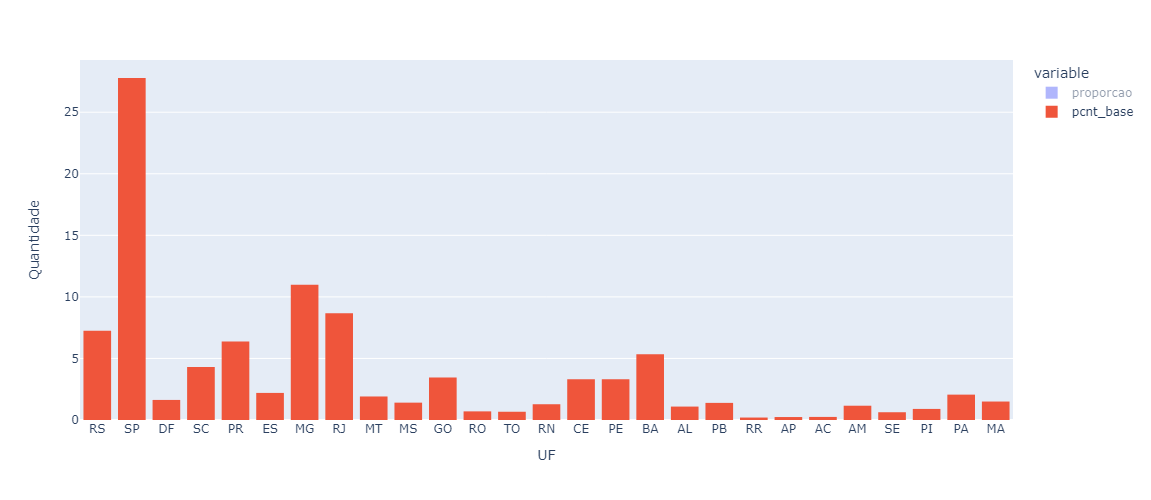

In [81]:
fig = px.histogram(df_join_pop,
             x = "UF", 
             y=['proporcao','pcnt_base'],
             height = 500, width = 960,
             histnorm = 'percent')
fig.update_xaxes(title = "UF")
fig.update_yaxes(title = "Quantidade")
#fig.show()
#py.plot(fig, filename = 'Count pnt', auto_open=True)

In [79]:
df_join_pop

,UF,count,Pop,proporcao,pcnt_base
0,RS,2443314,11088065.0,22.04,7.24
1,SP,9369451,46024937.0,20.36,27.77
2,DF,549490,2923369.0,18.80,1.63
3,SC,1451461,7762154.0,18.70,4.30
4,PR,2152015,11835379.0,18.18,6.38
5,ES,742833,4108508.0,18.08,2.20
6,MG,3704075,20732660.0,17.87,10.98
7,RJ,2923429,16615526.0,17.59,8.67
8,MT,645940,3784239.0,17.07,1.91
9,MS,475809,2833742.0,16.79,1.41


In [ ]:
['Quantiadade de MEIs por estado', 'Proporção da de MEIs pelo total da população do estado']

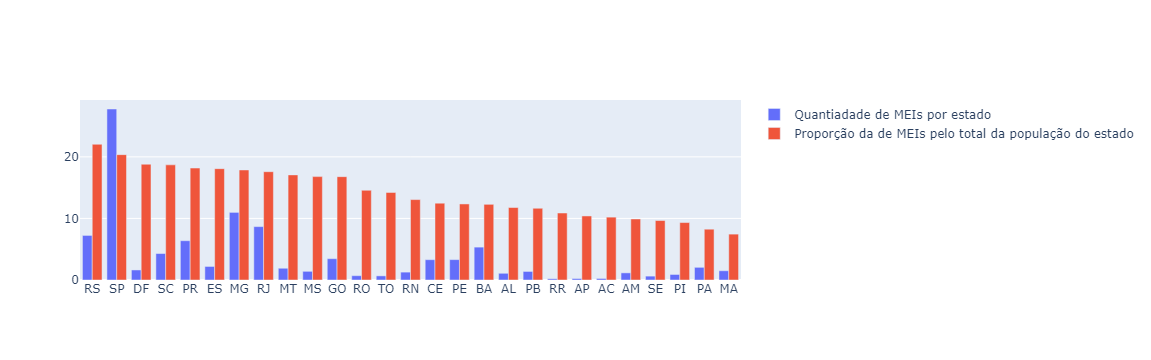

'https://plotly.com/~mateusmoraesalmeida/46/'

In [85]:
fig = go.Figure(data=[
    go.Bar(name='Quantiadade de MEIs por estado', x=df_join_pop.UF, y=df_join_pop.pcnt_base),
    go.Bar(name='Proporção da de MEIs pelo total da população do estado', x=df_join_pop.UF, y=df_join_pop.proporcao)
])

fig.show()
py.plot(fig, filename = 'proporcao_pop_meis', auto_open=True)

In [74]:
df_uf['pcnt_base'] = ((df_uf['count']/33734992)*100).round(2)

C:\Users\pedro\AppData\Local\Temp\ipykernel_27652\2705818083.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



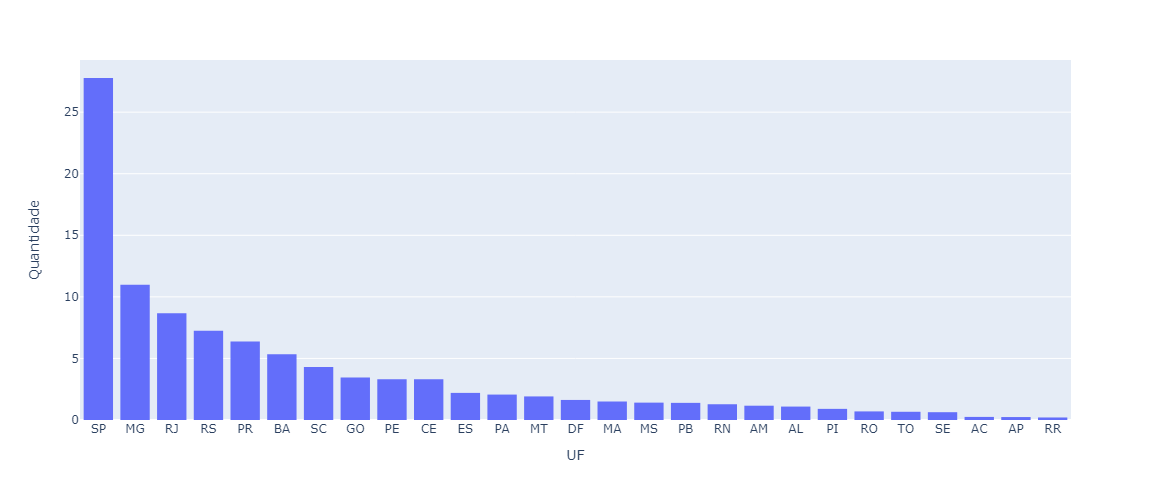

In [69]:
fig = px.histogram(df_uf,
             x = "UF", 
             y='count',
             height = 500, width = 960,
             histnorm = 'percent')
fig.update_xaxes(title = "UF")
fig.update_yaxes(title = "Quantidade")
#fig.show()
#py.plot(fig, filename = 'Count pnt', auto_open=True)

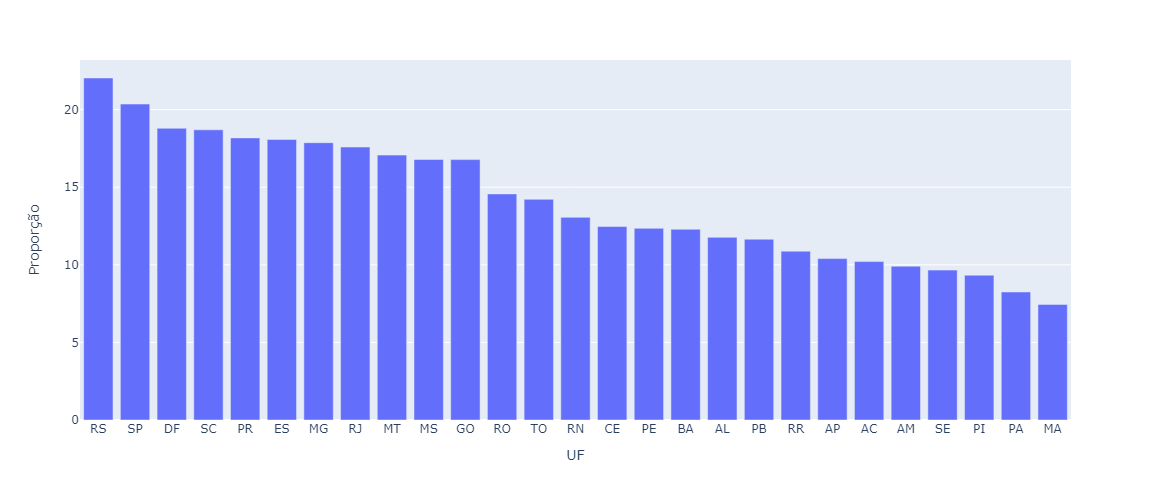

'https://plotly.com/~mateusmoraesalmeida/46/'

In [67]:
fig = px.bar(df_join_pop,
             x = "UF", 
             y='proporcao',
             height = 500, width = 960)
fig.update_xaxes(title = "UF")
fig.update_yaxes(title = "Proporção")
fig.show()
py.plot(fig, filename = 'proporcao_pop_meis', auto_open=True)

In [92]:
d = {'jan': [2.91,10.34], 
'fev': [7.62, 6.68], 
'mar': [3.77, 7.96], 
'abr': [4.62, 8.93], 
'mai': [5.42,  9.2], 
'jun': [6.35, 5.25], 
'jul': [2.22, 11.43], 
'ago': [8.2, 12.9], 
'set': [9.1, 13.3], 
'out': [10.23, 14.52], 
'nov': [11.35, 15.22], 
'dez': [13.24, 16.93]}
df = pd.DataFrame(data=d)
df

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
0,2.91,7.62,3.77,4.62,5.42,6.35,2.22,8.2,9.1,10.23,11.35,13.24
1,10.34,6.68,7.96,8.93,9.20,5.25,11.43,12.9,13.3,14.52,15.22,16.93


In [95]:
df.transpose().describe()

,0,1
count,12.000000,12.000000
mean,7.085833,11.055000
std,3.477613,3.609826
min,2.220000,5.250000
25%,4.407500,8.687500
50%,6.985000,10.885000
75%,9.382500,13.605000
max,13.240000,16.930000


In [94]:
df.transpose().sum()/12

0     7.085833
1    11.055000
dtype: float64

# Distribuição percentual do sexo dos MEIs cadastrados no BRasil

In [8]:
%%time
df = spark.read.parquet('C:/Users/pedro/Documents/Curso de pos graduação de EST/DADOS_CNPJ/df_final/')
df_uf = df.groupBy('CLASSIFICACAO').count().orderBy(col('count').desc()).toPandas()

fig = px.histogram(df_uf,
             x = "CLASSIFICACAO", 
             y='count',
             height = 400, width = 700,
             histnorm = 'percent')
fig.update_xaxes(title = "CLASSIFICACAO")
fig.update_yaxes(title = "Quantidade")
#fig.show()

fig.update_layout(
    title={
        'text': "Percentual de homens e mulheres que possuem MEI no Brasil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'color': 'black'}})
py.plot(fig, filename = 'percentual_sexo', auto_open=True)

CPU times: total: 609 ms
Wall time: 9.8 s


'https://plotly.com/~mateusmoraesalmeida/71/'

# Distribuição percentual dos telefones ffixo x celular cadastrados pelo MEIs

In [9]:
df = spark.read.parquet('C:/Users/pedro/Documents/Curso de pos graduação de EST/DADOS_CNPJ/df_telefone_tratado/')
df_tel_hig = df.groupBy('TIPO_TELEFONE').count().orderBy(col('count').desc()).toPandas()

In [12]:
fig = px.histogram(df_tel_hig,
             x = "TIPO_TELEFONE", 
             y='count',
             height = 400, width = 700,
             histnorm = 'percent')
fig.update_xaxes(title = "Tipo do telefone")
fig.update_yaxes(title = "Percentual")
#fig.show()

fig.update_layout(
    title={
        'text': "Percentual do tipo de telefone que os possuem MEIs no Brasil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'color': 'black'}})
py.plot(fig, filename = 'percentual_tipo_telefone', auto_open=True)

'https://plotly.com/~mateusmoraesalmeida/73/'

# Distribuição do provedores do MEI brasileiro

In [20]:
df_provedor = df.groupBy('PROVEDOR').count().orderBy(col('count').desc()).toPandas()

fig = px.histogram(df_provedor[:20],
             x = "PROVEDOR", 
             y='count',
             height = 400, width = 700,
             histnorm = 'percent')
fig.update_xaxes(title = "Provedor")
fig.update_yaxes(title = "Percentual")
#fig.show()

fig.update_layout(
    title={
        'text': "Percentual dos provedores que os possuem MEIs no Brasil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'color': 'black'}})
py.plot(fig, filename = 'percentual_provedores', auto_open=True)

'https://plotly.com/~mateusmoraesalmeida/76/'

# Distribuição das operadoras utilizadas pelos MEIs

In [24]:
df_operadora = df[(df['OPERADORA'] != 'oi')].groupBy('OPERADORA').count().orderBy(col('count').desc()).toPandas()

fig = px.histogram(df_operadora[:25],
             x = "OPERADORA", 
             y='count',
             height = 400, width = 700,
             histnorm = 'percent')
fig.update_xaxes(title = "Provedor")
fig.update_yaxes(title = "Percentual")
#fig.show()

fig.update_layout(
    title={
        'text': "Percentual das operadoras utilizadas MEIs no Brasil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'color': 'black'}})
py.plot(fig, filename = 'percentual_operadoras', auto_open=True)

'https://plotly.com/~mateusmoraesalmeida/80/'

In [21]:
df

CNPJ,NOME_EMPRESA,CAP_SOCIAL,NM_PORTE,NAT_JURICA,ENTE_FEDERATIVO,NM_QUALIFICACAO,CPF_LEN,PROBABILIDADE_DE_SER_CPF,PRIMEIRO_NOME,GRUPO_NOME,PROBABILIDADE_CLASSIFICACAO,CLASSIFICACAO,CNPJ_BASICO,NM_MATRIZ_FILIAL,NM_SIT_CADASTRAL,DT_INICIO_ATIVIDADE,ENDERECO_COMPLETO,TIPO_LOUGRADOURO,CEP,MUNICIPIO,DDD2,TEL2,valid_email,PROVEDOR,NM_MOTIVO,CNAE,NM_PAIS,ano_cadastro,mes_cadastro,DT_SIT_CADASTRAL,ano_sit_cadastral,mes_sit_cadastral,CPF_CRIPTOGRAFADO,TEL1,DDD1,TIPO_TELEFONE,OPERADORA,FAIXA_CEL,UF,CIDADES_REGIOES_PRINCIPAIS
33302442,TASSIANA RAMOS DA...,"1500,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,TASSIANA,TASSIANA,1.0,F,33302442,MATRIZ,INAPTA,2019-04-09,AVENIDA ARNALDO B...,AVENIDA,91720130,PORTO ALEGRE,NULL,NULL,tassicamara2705@g...,GMAIL,OMISSAO DE DECLAR...,Comércio varejist...,NULL,2019,4,2022-11-22,2022,11,+++9Suj4cLalTBe8i...,93597596,51,TELEFONE CELULAR,claro,99359,RS,Porto Alegre e Re...
37041179,GEOVANE RODRIGUES...,"100,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,GEOVANE,GEOVANE,1.0,M,37041179,MATRIZ,ATIVA,2020-04-30,"RUA ARACANGUIRA, ...",RUA,2878110,SAO PAULO,NULL,NULL,geovane.neves134@...,GMAIL,SEM MOTIVO,Instalação de pai...,NULL,2020,4,2020-04-30,2020,4,+++toGu8CaFdAlS9H...,39833472,11,TELEFONE FIXO,NULL,NULL,NULL,NULL
24533600,JAQUELINE FERREIR...,"10000,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,JAQUELINE,JAQUELINE,1.0,F,24533600,MATRIZ,INAPTA,2016-04-06,RUA CAMINHO DA BA...,RUA,59156219,PARNAMIRIM,NULL,NULL,NULL,NULL,OMISSAO DE DECLAR...,Comércio varejist...,NULL,2016,4,2022-11-25,2022,11,++/+hUzMn9qClQkwr...,99205219,84,TELEFONE CELULAR,tim,99920,RN,todo o estado
21503307,DIEGO ALEJANDRO O...,"600,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,DIEGO,DIEGO,1.0,M,21503307,MATRIZ,ATIVA,2014-12-02,RUA JOAQUIM NEVES...,RUA,4456205,SAO PAULO,NULL,NULL,diegomunozbrasil@...,GMAIL,SEM MOTIVO,Ensino de música,NULL,2014,12,2014-12-02,2014,12,++/3Db3KkwZygLwBP...,86981712,11,TELEFONE CELULAR,tim,98698,SP,Região Metropolit...
30912870,INGRID ALVES ROSA...,"1,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,INGRID,INGRID,1.0,F,30912870,MATRIZ,INAPTA,2018-07-12,"RUA MERCURIO, 616...",RUA,26553260,MESQUITA,NULL,NULL,rsbcontabilidadee...,GMAIL,OMISSAO DE DECLAR...,Promoção de vendas,NULL,2018,7,2021-03-19,2021,3,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
41740107,SONIA REGINA CAUS...,"3000,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,SONIA,SONIA,1.0,F,41740107,MATRIZ,BAIXADA,2021-04-28,RUA MARIA ISABEL ...,RUA,5757230,SAO PAULO,NULL,NULL,soniacaussofarias...,GMAIL,EXTINCAO POR ENCE...,Comércio varejist...,NULL,2021,4,2022-03-29,2022,3,++/S9Xay8W8iHo8cI...,23851420,11,TELEFONE FIXO,NULL,NULL,NULL,NULL
41423128,JARDEL DA SILVA L...,"1,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,JARDEL,JARDEL,1.0,M,41423128,MATRIZ,ATIVA,2021-03-31,"RUA SEXTA, 414, I...",RUA,38300044,ITUIUTABA,NULL,NULL,jardeljsl83@gmail...,GMAIL,SEM MOTIVO,Obras de alvenaria,NULL,2021,3,2021-03-31,2021,3,++1XbjdVctHkZDVss...,32621844,34,TELEFONE FIXO,NULL,NULL,NULL,NULL
23837465,MONICA RABELO DE ...,"5000,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,MONICA,MONICA,1.0,F,23837465,MATRIZ,BAIXADA,2015-12-14,RUA ANTONIO VITOR...,RUA,29820000,AGUA DOCE DO NORTE,NULL,NULL,NULL,NULL,EXTINCAO POR ENCE...,"Cabeleireiros, ma...",NULL,2015,12,2016-07-04,2016,7,++1gmaCUu0XWX15My...,37597137,27,TELEFONE FIXO,NULL,NULL,NULL,NULL
37272230,DOUGLAS VITORIA C...,"1000,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,DOUGLAS,DOUGLAS,1.0,M,37272230,MATRIZ,ATIVA,2020-05-30,"RUA FLORINEIA, 34...",RUA,26293390,NOVA IGUACU,NULL,NULL,douglazcohen@gmai...,GMAIL,SEM MOTIVO,Comércio varejist...,NULL,2020,5,2020-05-30,2020,5,++1u4OUKfd4V/Sxld...,84525698,21,TELEFONE CELULAR,tim,98452,RJ,Rio de Janeiro e ...
36677184,CACIENE CARIUS DA...,"1000,00",MICRO EMPRESA,Empresário (Indiv...,NULL,Empresário,11,SIM,CACIENE,CACIENE,1.0,F,36677184,MATRIZ,ATIVA,2020

In [29]:
21633869 -21047362

586507

In [26]:
df.describe()

summary,CNPJ,NOME_EMPRESA,CAP_SOCIAL,NM_PORTE,NAT_JURICA,ENTE_FEDERATIVO,NM_QUALIFICACAO,CPF_LEN,PROBABILIDADE_DE_SER_CPF,PRIMEIRO_NOME,GRUPO_NOME,PROBABILIDADE_CLASSIFICACAO,CLASSIFICACAO,CNPJ_BASICO,NM_MATRIZ_FILIAL,NM_SIT_CADASTRAL,ENDERECO_COMPLETO,TIPO_LOUGRADOURO,CEP,MUNICIPIO,DDD2,TEL2,valid_email,PROVEDOR,NM_MOTIVO,CNAE,NM_PAIS,ano_cadastro,mes_cadastro,ano_sit_cadastral,mes_sit_cadastral,CPF_CRIPTOGRAFADO,TEL1,DDD1,TIPO_TELEFONE,OPERADORA,FAIXA_CEL,UF,CIDADES_REGIOES_PRINCIPAIS
count,21633869,21633869,21633869,21633860,21633869,0,21633869,21633869,21633869,21633869,21047362,21047362,21047362,21633869,21633869,21633869,21633869,21633167,21633850,21633869,33536,33497,17421037,17421037,21633869,21633869,53,21633869,21633869,21632902,21632902,21514359,21514359,21514359,21514359,14112517,14112517,14112517,14112517
mean,3.139428650945529E7,NULL,NULL,NULL,NULL,NULL,NULL,11.0,NULL,NaN,NULL,0.9807283240869704,NULL,3.139428650945529E7,NULL,NULL,NULL,NULL,4.460838056357412E7,NULL,38.57412929389313,5.572442391040989E7,NULL,Infinity,NULL,NULL,NULL,2017.5240229567814,6.343730795448563,2019.5011039665412,5.721875409965802,NULL,7.335386829164582E7,42.31317414569497,NULL,NULL,99137.56430968338,NULL,NULL
stddev,1.0800483973115167E7,NULL,NULL,NULL,NULL,NULL,NULL,0.0,NULL,NaN,NULL,0.07859524196783399,NULL,1.0800483973115167E7,NULL,NULL,NULL,NULL,2.9527440671589937E7,NULL,20.0319929847846,2.8393031337574437E7,NULL,NaN,NULL,NULL,NULL,3.6480559281018756,3.3321643475358806,2.862272861821157,3.504185210683898,NULL,2.767414751143553E7,26.850099549171006,NULL,NULL,780.9152826013213,NULL,NULL
min,00007518,ANTONIO CARLOS D...,"0,00",EMPRESA DE PEQUE...,Associação Privada,NULL,Administrador,11,SIM,,ABADE,0.5,F,00007518,FILIAL,ATIVA,RUA GENERAL JÚL...,RUA,0,ABADIA DE GOIAS,00,0,,,ANULACAO DE INSCR...,Abate de aves,BRASIL,1965,1,1977,1,++++8xcjEUHvOt1ZF...,00000000,00,TELEFONE CELULAR,aeiou,95472,AC,Abrangência em to...
max,98598204,ZYVAN KLEY NEGROM...,"999999999,99",MICRO EMPRESA,Sociedade em Cont...,NULL,Titular de Empres...,11,SIM,ZYVAN,ZURMA,1.0,M,98598204,MATRIZ,SUSPENSA,�REA zona litoran...,�REA ESPECIAL,99990000,ZORTEA,99,99999999,�ssicagrampola@ho...,�HOTMAIL,SEM MOTIVO,atividades de des...,JAPAO,2023,12,2023,12,zzzzngUagmqC4rB0z...,99999999,99,TELEFONE FIXO,vivo,99999,TO,todo o estado
